# Лабораторная работа №1 по курсу "Машинное обучение"

Тояков Артем М8О-407Б-18

## Датасет

Начнём работу с загрузки датасета со статистикой игроков NBA.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('Seasons_Stats.csv')

Выведем некоторую информацию о датасете:

In [2]:
data.shape

(24691, 53)

In [3]:
print(data.columns.values)

['Unnamed: 0' 'Year' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'PER' 'TS%'
 '3PAr' 'FTr' 'ORB%' 'DRB%' 'TRB%' 'AST%' 'STL%' 'BLK%' 'TOV%' 'USG%'
 'blanl' 'OWS' 'DWS' 'WS' 'WS/48' 'blank2' 'OBPM' 'DBPM' 'BPM' 'VORP' 'FG'
 'FGA' 'FG%' '3P' '3PA' '3P%' '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%'
 'ORB' 'DRB' 'TRB' 'AST' 'STL' 'BLK' 'TOV' 'PF' 'PTS']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

Исходя из полученной информации, нам интересны только год, в который играл человек, количество сыгранных игр, возраст игрока и количество забитых мячей.

In [5]:
data = data.drop(['Unnamed: 0', 'Player', 'Pos', 'Tm'], axis=1)
data = data.drop(data.iloc[:, 3:30], axis=1)
data = data.drop(['3PA', '3P%', '2PA', '2P%'], axis=1)
data = data.drop(data.iloc[:, 5:19], axis=1)

In [6]:
data.shape

(24691, 5)

In [7]:
data.describe()

,Year,Age,G,3P,2P
count,24624.000000,24616.000000,24624.000000,18927.000000,24624.000000
mean,1992.594989,26.664405,50.837110,22.215037,178.250447
std,17.429594,3.841892,26.496161,38.543366,179.478923
min,1950.000000,18.000000,1.000000,0.000000,0.000000
25%,1981.000000,24.000000,27.000000,0.000000,35.000000
50%,1996.000000,26.000000,58.000000,2.000000,122.000000
75%,2007.000000,29.000000,75.000000,27.000000,268.000000
max,2017.000000,44.000000,88.000000,402.000000,1597.000000


In [8]:
print(data.columns.values)

['Year' 'Age' 'G' '3P' '2P']


In [9]:
data['Year'].value_counts()

2015.0    651
2011.0    625
2014.0    611
2008.0    595
2017.0    595
         ... 
1959.0    110
1955.0    109
1957.0    107
1956.0    106
1961.0    104
Name: Year, Length: 68, dtype: int64

In [10]:
data['Age'].value_counts()

24.0    2794
23.0    2748
25.0    2518
26.0    2380
27.0    2149
22.0    1926
28.0    1823
29.0    1576
30.0    1433
31.0    1179
32.0     952
33.0     713
21.0     609
34.0     538
35.0     347
20.0     288
36.0     210
37.0     143
19.0     111
38.0      92
39.0      48
40.0      16
18.0      13
41.0       5
42.0       3
44.0       1
43.0       1
Name: Age, dtype: int64

In [11]:
data['G'].value_counts()

82.0    1813
81.0     964
80.0     938
79.0     757
78.0     610
        ... 
84.0      10
85.0       6
86.0       2
87.0       1
88.0       1
Name: G, Length: 88, dtype: int64

Необходимо проверить, есть ли в датасете пустые значения. Если таковые будут - их необходимо удалить, чтобы датасет был более красивым и практичным для дальнейшей работы.

In [12]:
data['3P'].value_counts()

0.0      7149
1.0      1521
2.0       796
3.0       614
4.0       446
         ... 
257.0       1
276.0       1
193.0       1
402.0       1
324.0       1
Name: 3P, Length: 240, dtype: int64

In [13]:
data['2P'].value_counts()

0.0      452
1.0      400
2.0      386
3.0      359
5.0      282
        ... 
862.0      1
931.0      1
688.0      1
888.0      1
957.0      1
Name: 2P, Length: 889, dtype: int64

## Преобразование датасета

Для начала устраним все выбросы.

In [14]:
missing_values_count = data.isnull().sum()

missing_values_count[0:5]

Year      67
Age       75
G         67
3P      5764
2P        67
dtype: int64

Видно, что в колонке трёхочковых очень много недостающих значений (~25%), поэтому удалим все эти строчки.

In [15]:
data['3P'].isnull().max()

True

In [16]:
data = data.dropna()

In [17]:
data['3P'].isnull().max()

False

In [18]:
data.shape

(18927, 5)

Оставшиеся строчки и столбцы полностью заполнены, поэтому можем переходить к построению зависимостей.

## Визуализация зависимостей

In [19]:
cols = list(data.columns)
data[cols] = data[cols].apply(lambda x: pd.Categorical(x).codes)
data

,Year,Age,G,3P,2P
5727,0,14,81,0,776
5728,0,7,66,0,153
5729,0,7,74,0,465
5730,0,13,79,4,379
5731,0,13,25,0,27
...,...,...,...,...,...
24686,37,6,61,0,253
24687,37,9,50,0,78
24688,37,2,18,0,10
24689,37,4,43,33,55


Посмотрим на распределение наших признаков.

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'3P'}>],
       [<AxesSubplot:title={'center':'2P'}>, <AxesSubplot:>]],
      dtype=object)

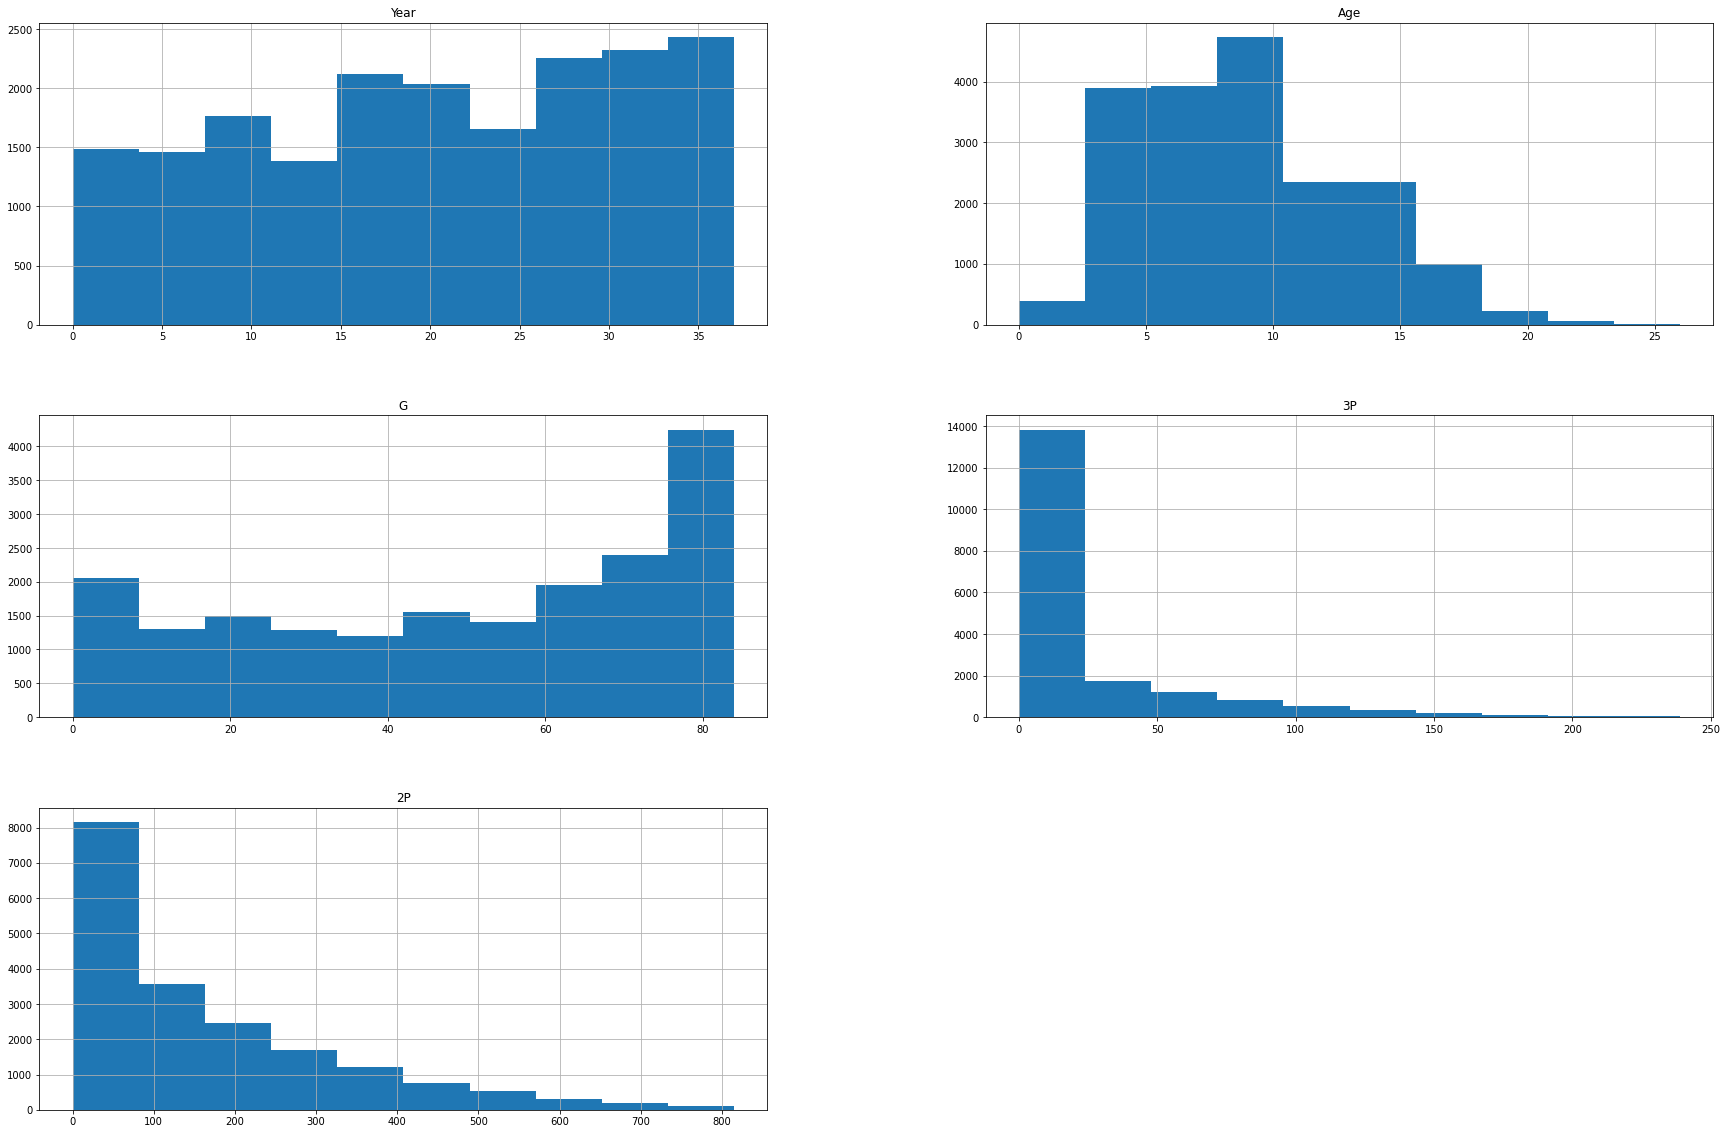

In [20]:
data[cols].hist(figsize=(30,20))

Также необходимо посмотреть на зависимости между признаками:

In [21]:
data.corr()

,Year,Age,G,3P,2P
Year,1.000000,0.020290,-0.102183,0.269155,-0.192760
Age,0.020290,1.000000,0.017809,0.058648,-0.016803
G,-0.102183,0.017809,1.000000,0.389312,0.714158
3P,0.269155,0.058648,0.389312,1.000000,0.252005
2P,-0.192760,-0.016803,0.714158,0.252005,1.000000


### Выводы
1. Исходя из полученного результата можно сделать вывод, что наибольшее количество игр играют те игроки, которые забивают наибольшее количество очков, что в принципе логично.
2. Год, в который играли люди, влияет только на количество трёхочковых, но всего на ~30%.
3. Возраст игроков не влияет на остальные параметры, т. к. коэффициенты корреляции < 0.1.
4. После того, как я обработал данные, в них всё ещё остались некоторые дефекты, например, маленькое количество столбцов и следовательно, меньшее количество зависимостей. В рамках этой лабораторной работы я решил не сильно усложнять себе задачу и выбрал только 5 столбцов. В реальной жизни такие примеры можно встретить редко, но для изучения основ машинного обучения этого хватило.

## Реализация алгоритма KNN

Так как в моём датасете нет ни одного булевого параметра, а задача написания kNN для данных с числом классов > 2 более сложная, я возьму датасет titanic, в котором есть булове значение survived и который является довольно популярным для изучения ML, и протестирую алгоритм на нём.

Приведение данных в надлежащий вид:

In [32]:
trainDataset = pd.read_csv('titanic.csv')
trainDataset = trainDataset.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)
trainDataset['Sex'] = trainDataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
trainDataset['Age'] = trainDataset['Age'].fillna(trainDataset['Age'].mean())
freq_port = trainDataset.Embarked.dropna().mode()[0]
trainDataset['Embarked'] = trainDataset['Embarked'].fillna(freq_port)
trainDataset['Embarked'] = trainDataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [27]:
from sklearn.model_selection import train_test_split

X, Y = trainDataset.drop(columns=['Survived']).to_numpy(), np.array(trainDataset['Survived'])

#разбиваю выборку на трейн и тест. Для теста выделяю 30% выборки.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,random_state=42,shuffle = True)

In [28]:
# евклидова метрика
def distance(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

def myKnn(xData, k, xTrain, yTrain):
    y = np.zeros(xData.shape[0])
    n = xData.shape[0]
    for index in range(n):
        xLine = xData[index]
        distanceData = np.zeros((n,2))
        # расстояние до каждого вектора из обучающей выборки
        for i in range(n):
            distanceData[i][0] = i
            distanceData[i][1] = distance(xLine,xTrain[i])
        # сортирую по значению расстояния до вектора
        neighbors = sorted(distanceData, key = lambda x : x[1])[:k]
        amount = [0,0]
        # определяю какое значение преобладает у k "ближайших соседей"
        for i in range(k):
            amount[yTrain[int(neighbors[i][0])]] += 1
        if amount[0] > amount[1]:
            y[index] = 0
        else:
            y[index] = 1
    return y

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# основные метрики
def print_accuracy(y, y0):
    tp, fp, tn, fn = 0, 0, 0, 0

    for i in range(y.shape[0]):
        if y[i] == 0 and y0[i] == 0: tn += 1
        if y[i] == 1 and y0[i] == 0: fn += 1
        if y[i] == 0 and y0[i] == 1: fp += 1
        if y[i] == 1 and y0[i] == 1: tp += 1
        
    print('Accuracy:', (tp + tn) / (tp + tn + fp + fn))
    print('Precision:', tp / (tp + fp))
    print('Recall:', tp / (tp + fn))

print("lib KNeighborsClassifier")
sk_knn = KNeighborsClassifier(n_neighbors=25, weights="distance")
sk_knn.fit(Xtrain, Ytrain)
print_accuracy(Ytest, sk_knn.predict(Xtest))
print("-----------------------")
print("my KNeighborsClassifier")
print_accuracy(Ytest, myKnn(Xtest,25, Xtrain, Ytrain))

lib KNeighborsClassifier
Accuracy: 0.7126865671641791
Precision: 0.7428571428571429
Recall: 0.46846846846846846
-----------------------
my KNeighborsClassifier
Accuracy: 0.6902985074626866
Precision: 0.7692307692307693
Recall: 0.36036036036036034


Я поставил количество соседей равным 25. Сортировки и метрики в обоих реализациях одинаковы. По метрике Precision и при текущих настройках моя реализация knn точнее на 2-3%. Recall показыает то, что мой алгоритм kNN хуже предсказывает положительные ответы (выживших людей).

## Реализация наивного Байесовского классификатора

Наивный Байесовский классификатор оценивает вероятности принадлежности строки к классам и возвращает класс с наибольшей вероятностью. Эти вероятности вычисляются как произведения условных вероятностей для каждого элемента строки и вероятности данного класса. В своем примере я использовал нормальное распределение.

In [30]:
class NBayes():
    
    @staticmethod
    def probChars(X):
        # среднее значение величины - мат. ожидание
        means = np.mean(X, axis=0)
        # среднее квадратичное отклонение
        stds = np.std(X, axis=0)
        return list(zip(means, stds))

    @staticmethod
    def gaussProb(x, mean, std):
        return (1 / np.sqrt(2 * np.pi * np.square(std))) * np.exp(-np.square(x - mean) / (2 * np.square(std)))

    def fit(self, X, y):
        classRows = {}
        for row, cls in zip(X, y):
            if cls not in classRows:
                classRows[cls] = list()
            classRows[cls].append(row)
        self.clsLabels = np.unique(y)
        # мат. ожидание и отклонение для каждого поля и для уникального значения 0 и 1
        self.charsByClass = {cls: NBayes.probChars(rows) for cls, rows in classRows.items()}
        # вероятности для уникального значения 0 и 1
        self.probByClass = {cls: len(rows) / len(X) for cls, rows in classRows.items()}
        

    def predict(self, X):
        y = []
        for row_to_predict in X:
            resultProbs = {}
            for cls in self.clsLabels:
                # произведение плотности распределений полей
                likelhood = 1
                for i, (mean, std) in enumerate(self.charsByClass[cls]):
                    likelhood *=  NBayes.gaussProb(row_to_predict[i], mean, std)
                resultProbs[cls] = self.probByClass[cls] * likelhood
                # уникальное значение у которого max(self.probByClass[cls] * likelhood)
            y.append(max(resultProbs.items(), key=lambda kv: kv[1])[0])
        return y

In [31]:
from sklearn.naive_bayes import GaussianNB
print("my NBayes")
bayes = NBayes()
bayes.fit(Xtrain, Ytrain)
print_accuracy(Ytest, bayes.predict(Xtest))
print("-------------")
print("lib NBayes")
sklearn_bayes = GaussianNB()
sklearn_bayes.fit(Xtrain, Ytrain)
print_accuracy(Ytest, sklearn_bayes.predict(Xtest))

my NBayes
Accuracy: 0.7985074626865671
Precision: 0.7614678899082569
Recall: 0.7477477477477478
-------------
lib NBayes
Accuracy: 0.7985074626865671
Precision: 0.7614678899082569
Recall: 0.7477477477477478


Как видно, значение метрик совпадают. Данный классификатор лучше распознает положительные ответы, точность исследования получилось примерно равная.